**Overview**

The sinking of the **RMS Titanic** is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

https://www.kaggle.com/c/titanic/data

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

### Loading Dataset

In [3]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of Features :** 
- **Categorical**  - Sex, and Embarked.
- **Continuous **  - Age, Fare
- **Discrete**     - SibSp, Parch.
- **Alphanumeric** - Cabin

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color = 'green'>Numerical Value Analysis</font>

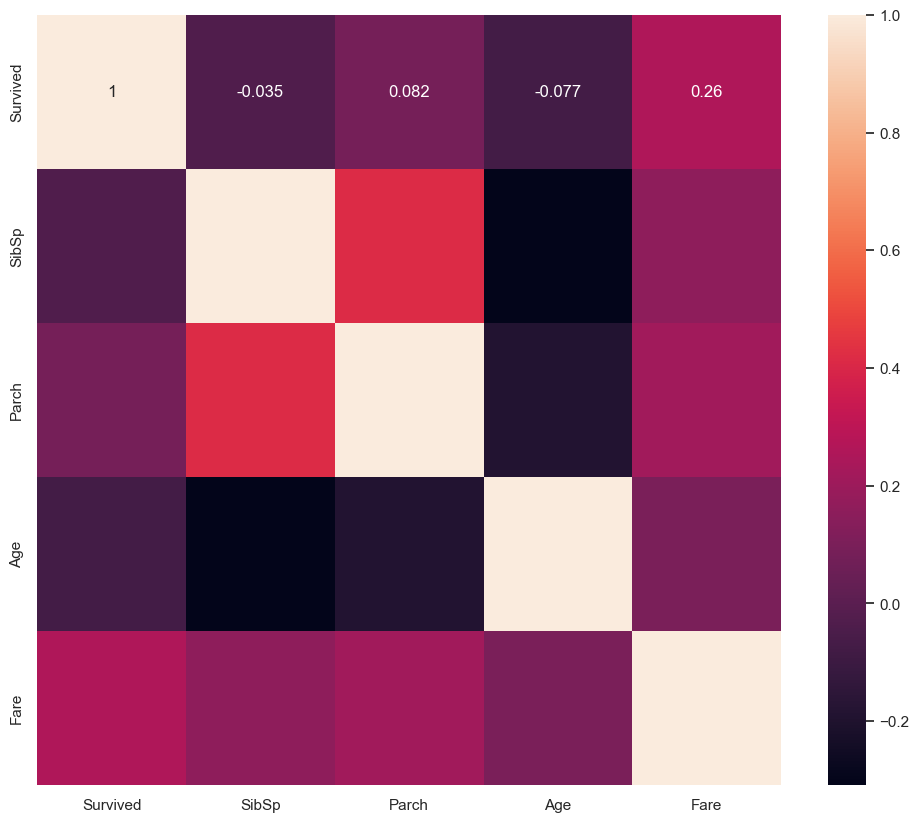

In [7]:

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

**Conclusion : **

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

## <font color = "green">sibsp - Number of siblings / spouses aboard the Titanic </font>

In [14]:
data['SibSp'].nunique()

7

In [15]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [16]:
bargraph_sibsp = sns.factorplot(x = "SibSp", y = "Survived", data = data, kind = "bar", size = 8)
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

AttributeError: module 'seaborn' has no attribute 'factorplot'

It seems that passengers having a lot of siblings/spouses have less chance to survive.
<br />
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

## <font color = "green"> Age </font>

In [17]:
age_visual = sns.FacetGrid(data, col = 'Survived', size=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'


Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived. 

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.


## <font color = "green">Sex</font>

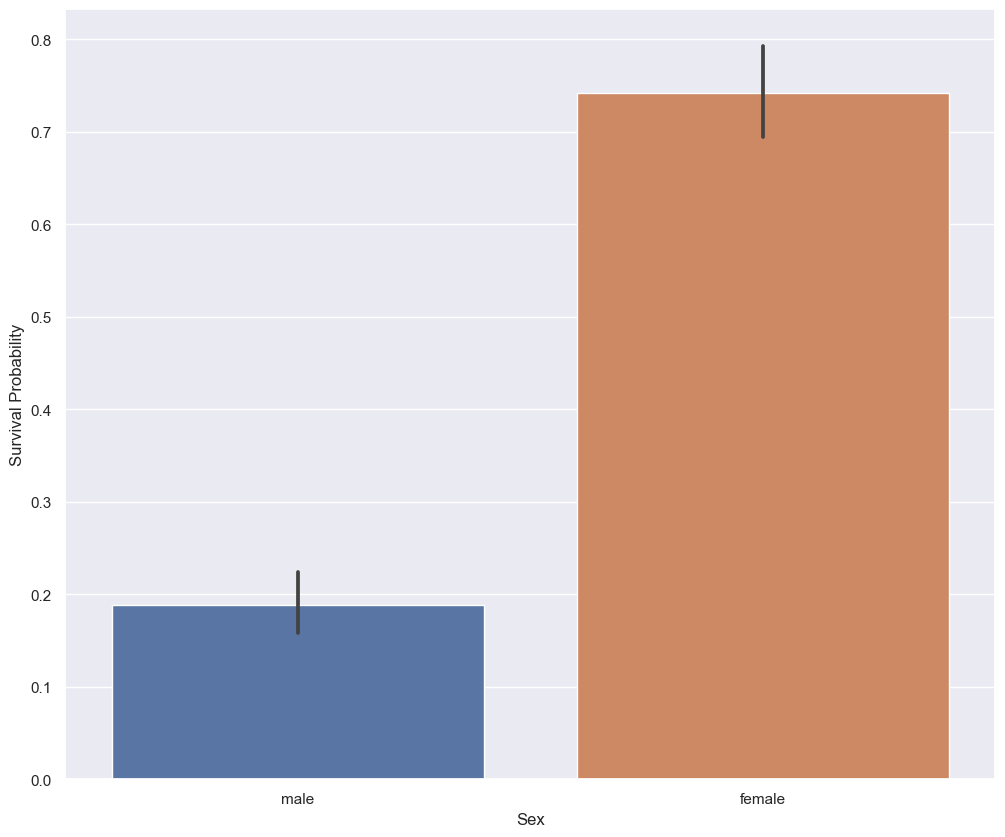

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "Sex",y = "Survived", data = data)
age_plot = age_plot.set_ylabel("Survival Probability")

In [19]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.
For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation  - **Women and children first**

## <font color = "green">PClass</font>

In [20]:
pclass = sns.factorplot(x = "Pclass", y = "Survived", data = data, kind = "bar", size = 8)
pclass = pclass.set_ylabels("survival probability")

AttributeError: module 'seaborn' has no attribute 'factorplot'

## <font color = "green">Pclass vs Survived by Sex</font>

In [21]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data, size=6, kind="bar")
g = g.set_ylabels("survival probability")

import warnings
warnings.filterwarnings("ignore")

AttributeError: module 'seaborn' has no attribute 'factorplot'

## <font color = "green">Embarked </font>

In [4]:
data["Embarked"].isnull().sum()

2

In [5]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [7]:
g = sns.factorplot(x="Embarked", y="Survived", data=data, size=7, kind="bar")
g = g.set_ylabels("survival probability")

AttributeError: module 'seaborn' has no attribute 'factorplot'

Passenger coming from Cherbourg (C) have more chance to survive.

### Let's find the reason

In [8]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=data, size=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [9]:
g = sns.factorplot("Sex", col="Embarked",  data=data, size=7, kind="count")

AttributeError: module 'seaborn' has no attribute 'factorplot'

Cherbourg passengers are mostly in first class which have the highest survival rate.
<br/>
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

# <font color = "green">Preparing data</font>

In [10]:
data = pd.read_csv('titanic_data.csv')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [14]:
data["Age"].isnull().sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

In [15]:
data["Embarked"].isnull().sum()

2

In [16]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [17]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [21]:
ports = {"S": 0, "C": 1, "Q": 2}

data['Embarked'] = data['Embarked'].map(ports)

In [22]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## <font color = "green">Splitting data</font>

In [24]:
# input and output data

x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [25]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

## <font color = "green">Feature Scaling</font>

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

## <font color = "green"> Classification</font>

In [29]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [30]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [32]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [33]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [34]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.85
Support Vector      :  81.34
Decision Tree       :  76.12
K-NN Classifier     :  82.09
Random Forest       :  82.09


In [43]:
import torch
x_train = torch.from_numpy(xtrain).float()

In [37]:
#y_train=torch.from_numpy(ytrain).float()
x_test=torch.from_numpy(xtest).float()
#y_test=torch.from_numpy(ytest).float()

In [48]:
ytrain_numpy = ytrain.values  # Convert Pandas Series to NumPy array

# Then convert NumPy array to PyTorch tensor
y_train = torch.from_numpy(ytrain_numpy).float()
y_train = y_train.view(-1, 1)

In [49]:
ytest_numpy = ytest.values  # Convert Pandas Series to NumPy array

# Then convert NumPy array to PyTorch tensor
y_test = torch.from_numpy(ytest_numpy).float()
y_test = y_test.view(-1, 1)

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture with more layers
class TitanicNet(nn.Module):
    def __init__(self):
        super(TitanicNet, self).__init__()
        # Input layer: Assuming 7 input features (e.g., gender, ticket class, etc.)
        self.fc1 = nn.Linear(7, 128)  # Increased size for the first layer
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)  # New layer
        self.fc5 = nn.Linear(16, 8)   # New layer
        self.fc6 = nn.Linear(8, 1)    # Output layer for binary classification
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.bn3 = nn.BatchNorm1d(32)
        self.bn4 = nn.BatchNorm1d(16)
        self.bn5 = nn.BatchNorm1d(8)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=0.1)
        
        # Weight initialization
        self.apply(self.weights_init)

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))  # Activation function (ReLU) and Batch Norm
        x = self.dropout(x)                # Dropout after first layer
        x = F.relu(self.bn2(self.fc2(x)))  # Activation function (ReLU) and Batch Norm
        x = self.dropout(x)                # Dropout after second layer
        x = F.relu(self.bn3(self.fc3(x)))  # Activation function (ReLU) and Batch Norm
        x = F.relu(self.bn4(self.fc4(x)))  # New layer with ReLU and Batch Norm
        x = F.relu(self.bn5(self.fc5(x)))  # New layer with ReLU and Batch Norm
        x = torch.sigmoid(self.fc6(x))     # Sigmoid for binary classification
        return x

# Custom optimizer (Gradient Descent with Momentum)
class CustomOptimizer:
    def __init__(self, params, lr=0.001, momentum=0.9):
        self.params = list(params)
        self.lr = lr
        self.momentum = momentum
        self.velocities = [torch.zeros_like(p) for p in self.params]
        
    def step(self):
        for i, param in enumerate(self.params):
            if param.grad is None:
                continue
            self.velocities[i] = self.momentum * self.velocities[i] - self.lr * param.grad
            param.data += self.velocities[i]
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

# Helper function to calculate accuracy
def calculate_accuracy(outputs, targets):
    # Convert probabilities to binary predictions
    predictions = (outputs > 0.5).float()  # Binary classification
    correct = (predictions == targets).float().sum()
    accuracy = correct / targets.size(0)  # Divide by total number of samples
    return accuracy

# Instantiate the network
model = TitanicNet()

# Loss function (Binary Cross Entropy since it's a binary classification task)
criterion = nn.BCELoss()

# Optimizer with Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass
    loss.backward()
    
    # Gradient clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    # Optimize
    optimizer.step()
    
    # Calculate accuracy (for training data)
    train_accuracy = calculate_accuracy(outputs, y_train)
    
    # Print loss and accuracy (optional)
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {train_accuracy.item()*100:.2f}%')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test)
    test_loss = criterion(test_outputs, y_test)
    
    # Calculate accuracy (for test data)
    test_accuracy = calculate_accuracy(test_outputs, y_test)
    
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy.item()*100:.2f}%')


Epoch [10/200], Loss: 0.6263, Accuracy: 63.72%
Epoch [20/200], Loss: 0.5571, Accuracy: 78.65%
Epoch [30/200], Loss: 0.5294, Accuracy: 79.94%
Epoch [40/200], Loss: 0.4929, Accuracy: 82.18%
Epoch [50/200], Loss: 0.4663, Accuracy: 82.66%
Epoch [60/200], Loss: 0.4641, Accuracy: 82.34%
Epoch [70/200], Loss: 0.4437, Accuracy: 83.63%
Epoch [80/200], Loss: 0.4270, Accuracy: 83.95%
Epoch [90/200], Loss: 0.4225, Accuracy: 84.11%
Epoch [100/200], Loss: 0.4116, Accuracy: 85.71%
Epoch [110/200], Loss: 0.4063, Accuracy: 83.79%
Epoch [120/200], Loss: 0.4068, Accuracy: 84.27%
Epoch [130/200], Loss: 0.3977, Accuracy: 84.59%
Epoch [140/200], Loss: 0.3858, Accuracy: 85.07%
Epoch [150/200], Loss: 0.3901, Accuracy: 83.63%
Epoch [160/200], Loss: 0.3838, Accuracy: 83.47%
Epoch [170/200], Loss: 0.3662, Accuracy: 84.59%
Epoch [180/200], Loss: 0.3680, Accuracy: 84.27%
Epoch [190/200], Loss: 0.3700, Accuracy: 84.91%
Epoch [200/200], Loss: 0.3709, Accuracy: 84.91%
Test Loss: 0.4234, Test Accuracy: 82.46%
